In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers_plot import initPlot, finalizePlot

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as mcb
from matplotlib.colors import LogNorm
import matplotlib.cm as cm

initPlot()

outdir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Plots_TalkMunich_Mar2022"

In [2]:
# Load Map3 measurements in MS
res_dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/results_MR"
map3_fft=np.load(res_dir+"/map_cubed_fft.npy")
print(map3_fft.shape)
map3_10bins=np.load(res_dir+"/map_cubed_treecorr_0p1_to_120.npy")
print(map3_10bins.shape)
map3_15bins=np.load(res_dir+"/map_cubed_treecorr_0p1_to_120_15_bins.npy")
print(map3_15bins.shape)

(7, 7, 7, 8, 64)
(6, 6, 6, 8, 64)
(6, 6, 6, 8, 32)


In [3]:
# Pick out Map³ and Mx²Map
# Treecorr output: 
#   0   Map3
#   1   Map2Mx
#   2   MapMxMap
#   3   MxMap2
#   4   Mx2Map
#   5   MxMapMx
#   6   MapMx2
#   7   Mx3

mapmapmap_fft=np.mean(map3_fft[:,:,:,0], axis=3)
mxmxmap_fft=np.mean(map3_fft[:,:,:,4], axis=3)
mapmapmap_10bins=np.mean(map3_10bins[:,:,:,0], axis=3)
mxmxmap_10bins=np.mean(map3_10bins[:,:,:,4], axis=3)
mapmapmap_15bins=np.mean(map3_15bins[:,:,:,0], axis=3)
mxmxmap_15bins=np.mean(map3_15bins[:,:,:,4], axis=3)

mapmapmap_fft_std=np.std(map3_fft[:,:,:,0], axis=3)/np.sqrt(64)
mxmxmap_fft_std=np.std(map3_fft[:,:,:,4], axis=3)/np.sqrt(64)
mapmapmap_10bins_std=np.std(map3_10bins[:,:,:,0], axis=3)/np.sqrt(64)
mxmxmap_10bins_std=np.std(map3_10bins[:,:,:,4], axis=3)/np.sqrt(64)
mapmapmap_15bins_std=np.std(map3_15bins[:,:,:,0], axis=3)/np.sqrt(64)
mxmxmap_15bins_std=np.std(map3_15bins[:,:,:,4], axis=3)/np.sqrt(64)

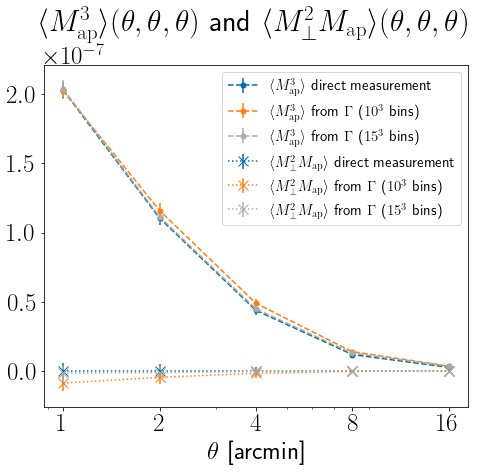

In [4]:
# Plot only equilateral Map³
thetas=np.array([1, 2, 4, 8, 16])
mapmapmap_fft_tmp=np.array([mapmapmap_fft[i,i,i] for i in range(1,6)])
mapmapmap_10bins_tmp=np.array([mapmapmap_10bins[i,i,i] for i in range(5)])
mapmapmap_15bins_tmp=np.array([mapmapmap_15bins[i,i,i] for i in range(5)])
mxmxmap_fft_tmp=np.array([mxmxmap_fft[i,i,i] for i in range(1,6)])
mxmxmap_10bins_tmp=np.array([mxmxmap_10bins[i,i,i] for i in range(5)])
mxmxmap_15bins_tmp=np.array([mxmxmap_15bins[i,i,i] for i in range(5)])

mapmapmap_fft_tmp_std=np.array([mapmapmap_fft_std[i,i,i] for i in range(1,6)])
mapmapmap_10bins_tmp_std=np.array([mapmapmap_10bins_std[i,i,i] for i in range(5)])
mapmapmap_15bins_tmp_std=np.array([mapmapmap_15bins_std[i,i,i] for i in range(5)])
mxmxmap_fft_tmp_std=np.array([mxmxmap_fft_std[i,i,i] for i in range(1,6)])
mxmxmap_10bins_tmp_std=np.array([mxmxmap_10bins_std[i,i,i] for i in range(5)])
mxmxmap_15bins_tmp_std=np.array([mxmxmap_15bins_std[i,i,i] for i in range(5)])



initPlot(labelsize=25, legendsize=15)
plt.style.use('tableau-colorblind10')
fig, ax=plt.subplots(figsize=(7,7))

thetas_ticks=[1,2,4,8,16]
thetas_labels=[r"$1$", r"$2$", r"$4$", r"$8$", r"$16$"]

#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels)

ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_title(r'$\langle M_\mathrm{ap}^3\rangle(\theta, \theta, \theta)$ and $\langle M_\perp^2 M_\mathrm{ap}\rangle(\theta, \theta, \theta)$ ', fontsize=30, y=1.08 )
ax.errorbar(thetas, mapmapmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ direct measurement')
ax.errorbar(thetas, mapmapmap_10bins_tmp, yerr=mapmapmap_10bins_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ from $\Gamma$ ($10^3$ bins)')
ax.errorbar(thetas, mapmapmap_fft_tmp+1e-9, yerr=mapmapmap_15bins_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ from $\Gamma$ ($15^3$ bins)')
ax.errorbar(thetas, mxmxmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ direct measurement', color='C0')
ax.errorbar(thetas, mxmxmap_10bins_tmp, yerr=mapmapmap_10bins_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ from $\Gamma$ ($10^3$ bins)', color='C1')
ax.errorbar(thetas, mxmxmap_15bins_tmp, yerr=mapmapmap_15bins_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ from $\Gamma$ ($15^3$ bins)', color='C2')

finalizePlot(ax, outputFn=outdir+"/Map3_meas_equi.png")


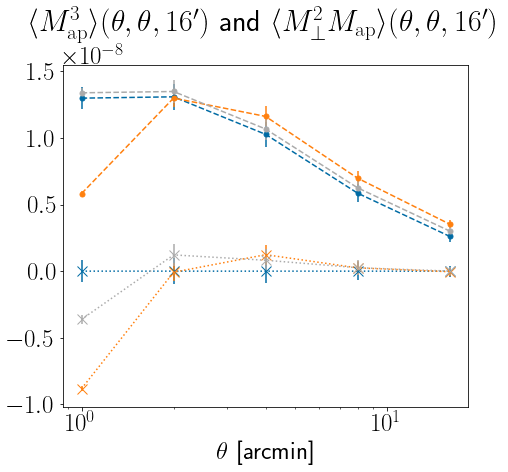

In [5]:
# Plot Map³ with (theta, theta, 16')
thetas=np.array([1, 2, 4, 8, 16])
mapmapmap_fft_tmp=np.array([mapmapmap_fft[i,i,5] for i in range(1,6)])
mapmapmap_10bins_tmp=np.array([mapmapmap_10bins[i,i,4] for i in range(5)])
mapmapmap_15bins_tmp=np.array([mapmapmap_15bins[i,i,4] for i in range(5)])
mxmxmap_fft_tmp=np.array([mxmxmap_fft[i,i,5] for i in range(1,6)])
mxmxmap_10bins_tmp=np.array([mxmxmap_10bins[i,i,4] for i in range(5)])
mxmxmap_15bins_tmp=np.array([mxmxmap_15bins[i,i,4] for i in range(5)])

mapmapmap_fft_tmp_std=np.array([mapmapmap_fft_std[i,i,5] for i in range(1,6)])
mapmapmap_10bins_tmp_std=np.array([mapmapmap_10bins_std[i,i,4] for i in range(5)])
mapmapmap_15bins_tmp_std=np.array([mapmapmap_15bins_std[i,i,4] for i in range(5)])
mxmxmap_fft_tmp_std=np.array([mxmxmap_fft_std[i,i,5] for i in range(1,6)])
mxmxmap_10bins_tmp_std=np.array([mxmxmap_10bins_std[i,i,4] for i in range(5)])
mxmxmap_15bins_tmp_std=np.array([mxmxmap_15bins_std[i,i,4] for i in range(5)])


#initPlot()
#plt.style.use('tableau-colorblind10')
fig, ax=plt.subplots(figsize=(7,7))
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_title(r"$\langle M_\mathrm{ap}^3\rangle(\theta, \theta, 16')$ and $\langle M_\perp^2 M_\mathrm{ap}\rangle(\theta, \theta, 16')$ ", fontsize=30, y=1.08)
ax.errorbar(thetas, mapmapmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ direct measurement')
ax.errorbar(thetas, mapmapmap_10bins_tmp, yerr=mapmapmap_10bins_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ from $\Gamma$ ($10^3$ bins)')
ax.errorbar(thetas, mapmapmap_fft_tmp+4e-10, yerr=mapmapmap_15bins_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ from $\Gamma$ ($15^3$ bins)')
ax.errorbar(thetas, mxmxmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ direct measurement', color='C0')
ax.errorbar(thetas, mxmxmap_10bins_tmp, yerr=mapmapmap_10bins_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ from $\Gamma$ ($10^3$ bins)', color='C1')
ax.errorbar(thetas, mxmxmap_15bins_tmp, yerr=mapmapmap_15bins_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ from $\Gamma$ ($15^3$ bins)', color='C2')

finalizePlot(ax, outputFn=outdir+"/Map3_meas_unequi_1.png", showlegend=False)

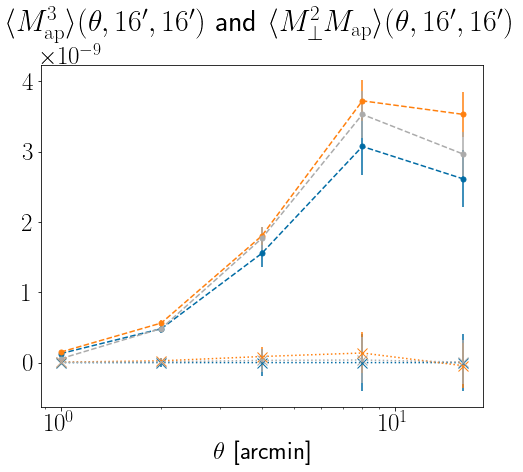

In [6]:
# Plot Map³ with (theta, 16', 16')
thetas=np.array([1, 2, 4, 8, 16])
mapmapmap_fft_tmp=np.array([mapmapmap_fft[i,5,5] for i in range(1,6)])
mapmapmap_10bins_tmp=np.array([mapmapmap_10bins[i,4,4] for i in range(5)])
mapmapmap_15bins_tmp=np.array([mapmapmap_15bins[i,4,4] for i in range(5)])
mxmxmap_fft_tmp=np.array([mxmxmap_fft[i,5,5] for i in range(1,6)])
mxmxmap_10bins_tmp=np.array([mxmxmap_10bins[i,4,4] for i in range(5)])
mxmxmap_15bins_tmp=np.array([mxmxmap_15bins[i,4,4] for i in range(5)])

mapmapmap_fft_tmp_std=np.array([mapmapmap_fft_std[i,5,5] for i in range(1,6)])
mapmapmap_10bins_tmp_std=np.array([mapmapmap_10bins_std[i,4,4] for i in range(5)])
mapmapmap_15bins_tmp_std=np.array([mapmapmap_15bins_std[i,4,4] for i in range(5)])
mxmxmap_fft_tmp_std=np.array([mxmxmap_fft_std[i,5,5] for i in range(1,6)])
mxmxmap_10bins_tmp_std=np.array([mxmxmap_10bins_std[i,4,4] for i in range(5)])
mxmxmap_15bins_tmp_std=np.array([mxmxmap_15bins_std[i,4,4] for i in range(5)])



fig, ax=plt.subplots(figsize=(7,7))
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_title(r"$\langle M_\mathrm{ap}^3\rangle(\theta, 16', 16')$ and $\langle M_\perp^2 M_\mathrm{ap}\rangle(\theta, 16', 16')$ ", fontsize=30, y=1.08)
ax.errorbar(thetas, mapmapmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ direct measurement')
ax.errorbar(thetas, mapmapmap_10bins_tmp, yerr=mapmapmap_10bins_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ from $\Gamma$ ($10^3$ bins)')
ax.errorbar(thetas, mapmapmap_15bins_tmp-1e-10, yerr=mapmapmap_15bins_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ from $\Gamma$ ($15^3$ bins)')
ax.errorbar(thetas, mxmxmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ direct measurement', color='C0')
ax.errorbar(thetas, mxmxmap_10bins_tmp, yerr=mapmapmap_10bins_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ from $\Gamma$ ($10^3$ bins)', color='C1')
ax.errorbar(thetas, mxmxmap_15bins_tmp, yerr=mapmapmap_15bins_tmp_std, marker='x', ms=10, ls=':', label=r'$\langle M_\perp^2 M_\mathrm{ap}\rangle$ from $\Gamma$ ($15^3$ bins)', color='C2')


finalizePlot(ax, outputFn=outdir+"/Map3_meas_unequi_2.png", showlegend=False)

In [7]:
# Load model
mapmapmap_model=np.loadtxt(res_dir+"/MapMapMap_bispec.dat")[:,3]

mapmapmap_model=mapmapmap_model.reshape([7,7,7])

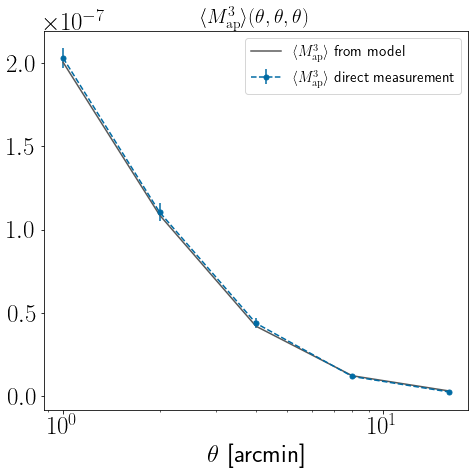

In [8]:
# Plot only equilateral Map³
thetas=np.array([1, 2, 4, 8, 16])
mapmapmap_fft_tmp=np.array([mapmapmap_fft[i,i,i] for i in range(1,6)])
mapmapmap_model_tmp=np.array([mapmapmap_model[i,i,i] for i in range(1,6)])

mapmapmap_fft_tmp_std=np.array([mapmapmap_fft_std[i,i,i] for i in range(1,6)])



fig, ax=plt.subplots(figsize=(7,7))
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_title(r'$\langle M_\mathrm{ap}^3\rangle(\theta, \theta, \theta)$ ', fontsize=20)
ax.errorbar(thetas, mapmapmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ direct measurement')
ax.plot(thetas, mapmapmap_model_tmp, ls='-', label=r'$\langle M_\mathrm{ap}^3\rangle$ from model', color='C3')

finalizePlot(ax, outputFn=outdir+"/Map3_mod_equi.png")


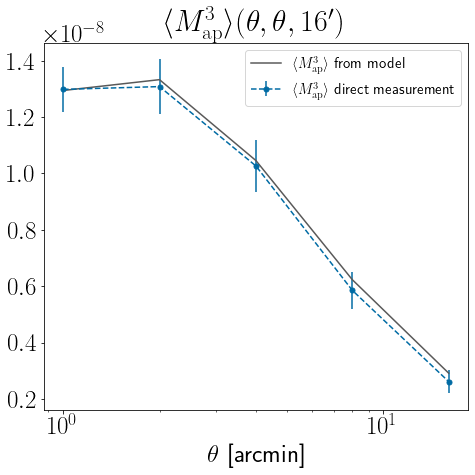

In [9]:
# Plot Map³(theta, theta, 16)
thetas=np.array([1, 2, 4, 8, 16])
mapmapmap_fft_tmp=np.array([mapmapmap_fft[i,i,5] for i in range(1,6)])
mapmapmap_model_tmp=np.array([mapmapmap_model[i,i,5]/1.1 for i in range(1,6)])

mapmapmap_fft_tmp_std=np.array([mapmapmap_fft_std[i,i,5] for i in range(1,6)])


fig, ax=plt.subplots(figsize=(7,7))
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_title(r"$\langle M_\mathrm{ap}^3\rangle(\theta, \theta, 16')$ ", fontsize=30)
ax.errorbar(thetas, mapmapmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ direct measurement')
ax.plot(thetas, mapmapmap_model_tmp, ls='-', label=r'$\langle M_\mathrm{ap}^3\rangle$ from model', color='C3')
plt.legend()

finalizePlot(ax, outputFn=outdir+"/Map3_mod_unequi_1.png", showlegend=False)

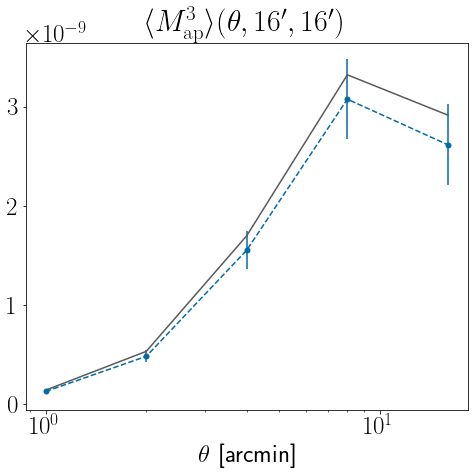

In [10]:
# Plot Map³(theta, 16, 16)
thetas=np.array([1, 2, 4, 8, 16])
mapmapmap_fft_tmp=np.array([mapmapmap_fft[i,5,5] for i in range(1,6)])
mapmapmap_model_tmp=np.array([mapmapmap_model[i,5,5]/1.1 for i in range(1,6)])

mapmapmap_fft_tmp_std=np.array([mapmapmap_fft_std[i,5,5] for i in range(1,6)])



fig, ax=plt.subplots(figsize=(7,7))
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_title(r"$\langle M_\mathrm{ap}^3\rangle(\theta, 16', 16')$ ", fontsize=30)
ax.errorbar(thetas, mapmapmap_fft_tmp, yerr=mapmapmap_fft_tmp_std, marker='.', ms=10, ls='--', label=r'$\langle M_\mathrm{ap}^3\rangle$ direct measurement')
ax.plot(thetas, mapmapmap_model_tmp, ls='-', label=r'$\langle M_\mathrm{ap}^3\rangle$ from model', color='C3')

finalizePlot(ax, outputFn=outdir+"/Map3_mod_unequi_2.png", showlegend=False)

In [11]:
# Load Covariances
cov_GRF=np.loadtxt("/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields_cosmicShear/cov_shapenoise_fft_sigma_0.0_n_167772.16_thetaMax_7.87.dat")

cov_T1inf=np.loadtxt("//home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields_cosmicShear/cov_infinite_term1Numerical_sigma_0.0_n_167772.16_thetaMax_7.87_gpu.dat")
cov_T2=np.loadtxt("//home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/GaussianRandomFields_cosmicShear/cov_square_term2Numerical_sigma_0.0_n_167772.16_thetaMax_7.87_gpu.dat")

In [12]:
# Set Thetas labels
thetas_ind = np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                       [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8],
                       [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)
cmap1=cm.get_cmap('viridis', 14)
cmap2=cm.get_cmap('RdBu', 16)

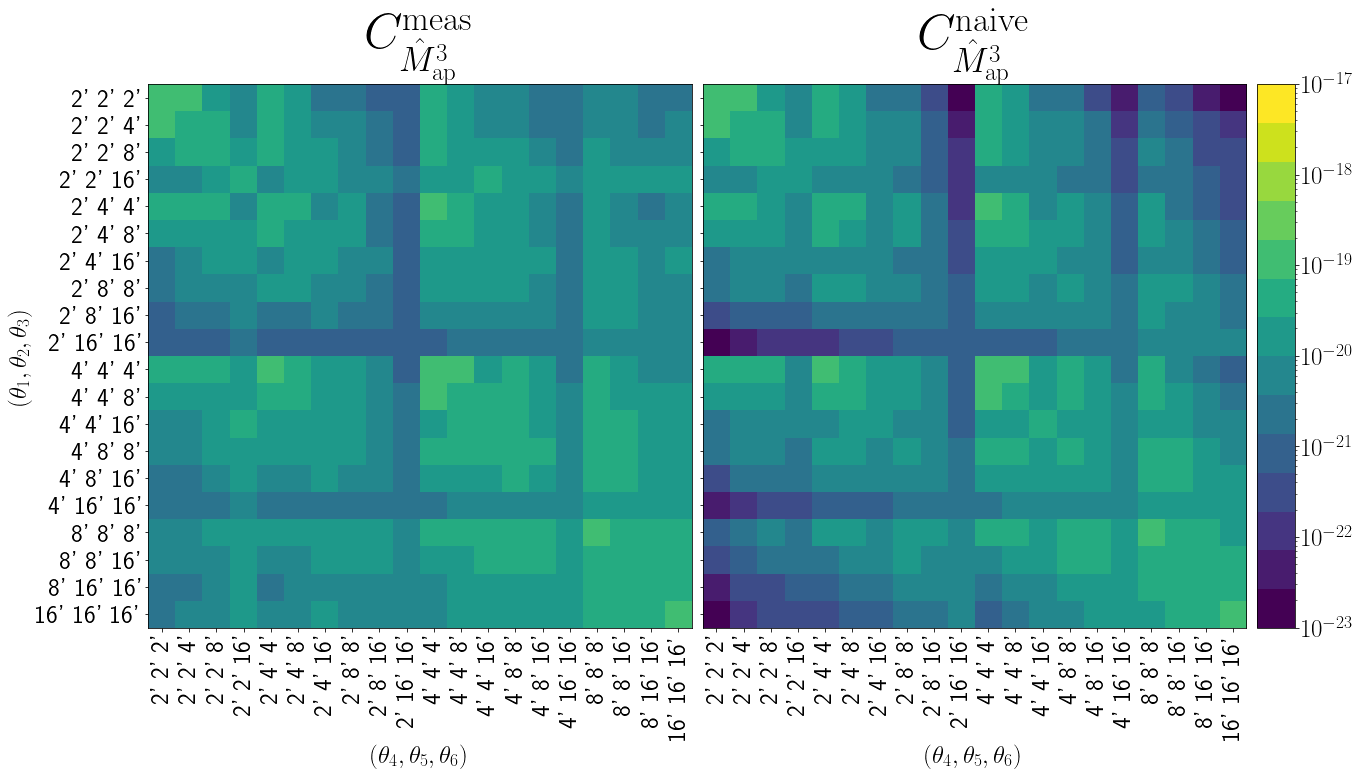

In [13]:
# Plot C Meas and C T1

fig= plt.figure(figsize=(25, 10))

grid=ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)

grid[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[1].set_xticks(thetas_ticks)
grid[1].set_xticklabels(thetas_labels, rotation=90)

grid[0].set_title(r"$C_{\hat{M}_\mathrm{ap}^3}^\mathrm{meas}$", fontsize=50)
im = grid[0].imshow(cov_GRF, norm=LogNorm(vmin=1e-23, vmax=1e-17), cmap=cmap1)  

grid[1].set_title(r"$C_{\hat{M}_\mathrm{ap}^3}^\mathrm{naive}$", fontsize=50)     
im = grid[1].imshow(cov_T1inf, norm=LogNorm(vmin=1e-23, vmax=1e-17), cmap=cmap1) 

grid[1].cax.cla()
mcb.Colorbar(grid[1].cax, im)

plt.savefig(outdir+"/CmeasCnaive.png", dpi=300)

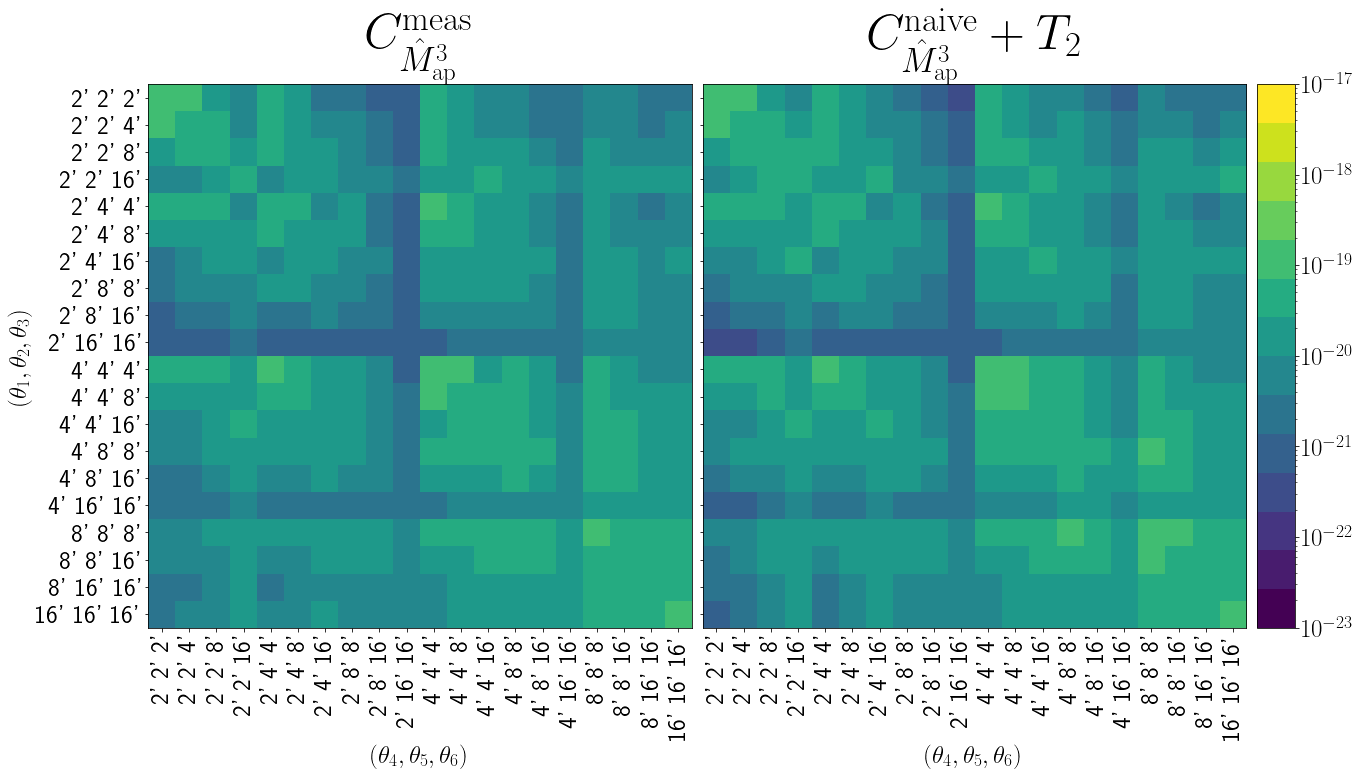

In [14]:
# Plot C Meas and C T1 + C T2
fig= plt.figure(figsize=(25, 10))

grid=ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)

grid[1].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[1].set_xticks(thetas_ticks)
grid[1].set_xticklabels(thetas_labels, rotation=90)

grid[0].set_title(r"$C_{\hat{M}_\mathrm{ap}^3}^\mathrm{meas}$", fontsize=50)
im = grid[0].imshow(cov_GRF, norm=LogNorm(vmin=1e-23, vmax=1e-17), cmap=cmap1)  

grid[1].set_title(r"$C_{\hat{M}_\mathrm{ap}^3}^\mathrm{naive} + T_2$", fontsize=50)     
im = grid[1].imshow(cov_T1inf+cov_T2, norm=LogNorm(vmin=1e-23, vmax=1e-17), cmap=cmap1) 

grid[1].cax.cla()
mcb.Colorbar(grid[1].cax, im)

plt.savefig(outdir+"/CmeasCfull.png", dpi=300)

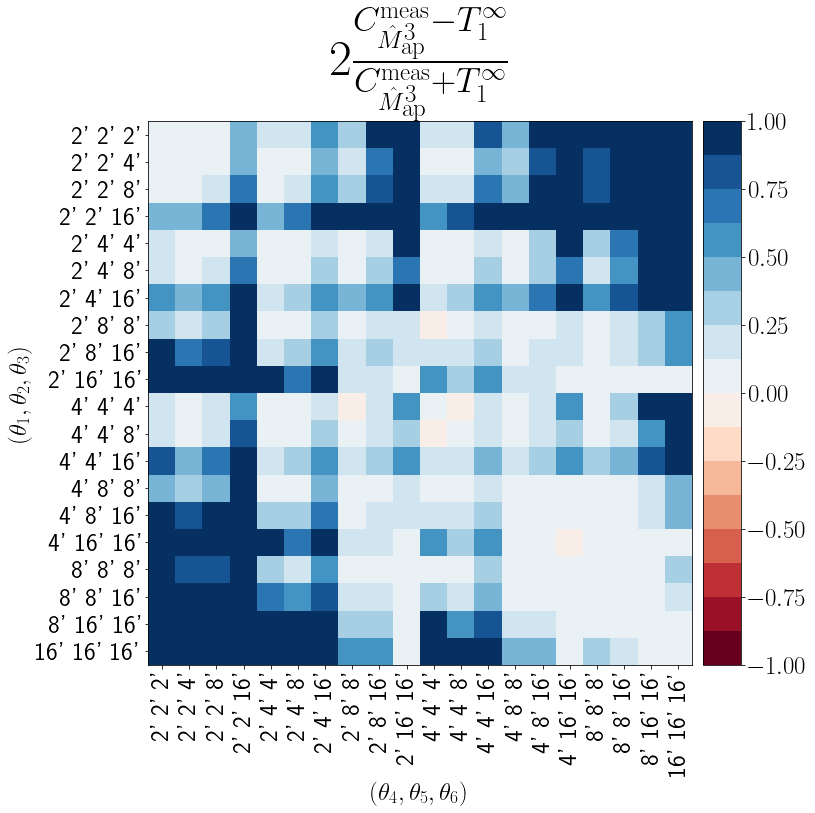

In [15]:
# Plot Rel Diff of C Meas and C T1

fig= plt.figure(figsize=(25, 10))

grid=ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)



grid[0].set_title(r"$2 \frac{C_{\hat{M}_\mathrm{ap}^3}^\mathrm{meas} - T_1^{\infty}}{C_{\hat{M}_\mathrm{ap}^3}^\mathrm{meas} + T_1^{\infty}}$", fontsize=50)
im = grid[0].imshow(2*(cov_GRF-cov_T1inf)/(cov_GRF+cov_T1inf), vmin=-1, vmax=1, cmap=cmap2)  



grid[0].cax.cla()
mcb.Colorbar(grid[0].cax, im)

plt.savefig(outdir+"/RatioCmeasCnaive.png", dpi=300)

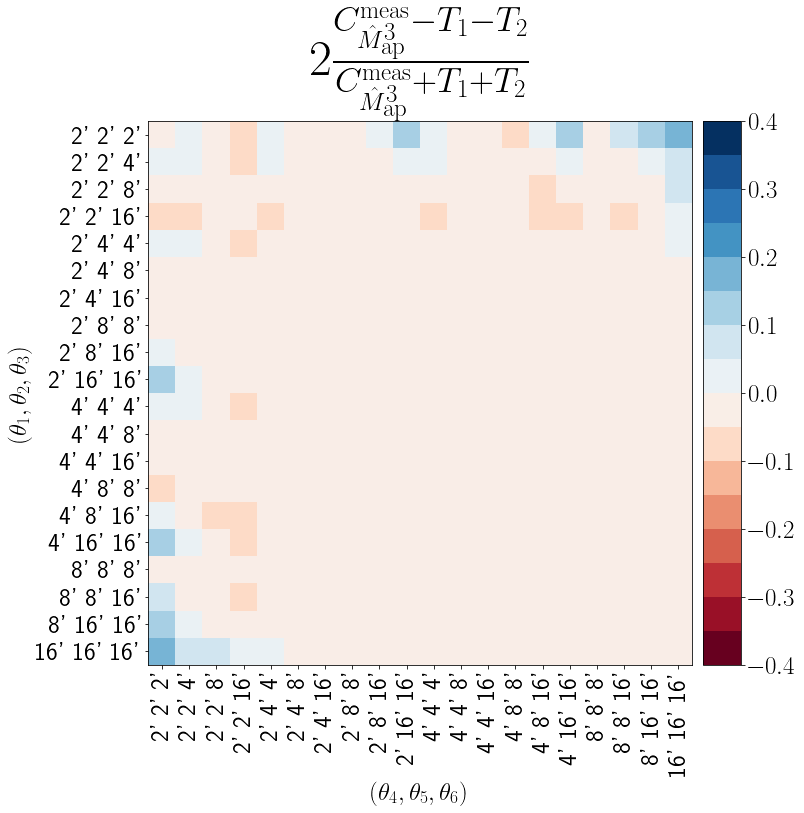

In [16]:
# Plot Rel Diff of C Meas and C T1 + T2
fig= plt.figure(figsize=(25, 10))

grid=ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0.15, share_all=True, cbar_location="right", cbar_mode="single", cbar_size="7%", cbar_pad=0.15)
grid[0].set_ylabel(r'$(\theta_1, \theta_2, \theta_3)$')
grid[0].set_yticks(thetas_ticks)
grid[0].set_yticklabels(thetas_labels)

grid[0].set_xlabel(r'$(\theta_4, \theta_5, \theta_6)$')
grid[0].set_xticks(thetas_ticks)
grid[0].set_xticklabels(thetas_labels, rotation=90)

diff=(cov_GRF-cov_T1inf-cov_T2)/(cov_GRF+cov_T1inf+cov_T2)

grid[0].set_title(r"$2 \frac{C_{\hat{M}_\mathrm{ap}^3}^\mathrm{meas} - T_1 - T_2}{C_{\hat{M}_\mathrm{ap}^3}^\mathrm{meas} + T_1 + T_2}$", fontsize=50)
im = grid[0].imshow(0.25*(diff+diff.T), vmin=-0.4, vmax=0.4, cmap=cmap2)  



grid[0].cax.cla()
mcb.Colorbar(grid[0].cax, im)

plt.savefig(outdir+"/RatioCmeasCfull.png", dpi=300)